# Stock Portfolio Notebook

## Set Up and Execute Alapaca SDK Request

### Importing the Required Libraries

In [17]:
# Import Required Libraries

import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import numpy as np
from pathlib import Path
import matplotlib.ticker as mticker

%matplotlib inline


### Loading the .env file

In [2]:
# Make sure dotenv is loaded
load_dotenv()

True

### Alpaca API and Secret Key Variables

In [3]:
# Create Alpaca key variables to call from .env() file
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

display(type(alpaca_api_key))
display(type(alpaca_secret_key))

str

str

### Create the ALpaca REST Object

In [4]:
# Create our Alpaca REST object
alpaca = tradeapi.REST(
  alpaca_api_key,
  alpaca_secret_key,
  api_version="v2"
)

alpaca

### Set the Start and End Dates

In [5]:
# Set the start and end dates for the information we want to pull from Alpaca
start_date = pd.Timestamp("2018-01-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-11-05", tz="America/New_York").isoformat()

### Set the Tickers for Alpaca to Fetch

In [6]:
# Set the list of tickers we want the Alpaca request to fetch
tickers = ["FB", "AMZN", "PG", "XOM", "JPM", "JNJ", "HON", "LIN", "AMT", "AAPL", "NEE"]

### Set the Timeframe for the Alpaca Request

In [7]:
# Set the timeframe of collection. We just need the a daily price point
timeframe = "1D"

### Create the Request for Alpaca Using get_barset()

In [8]:
# Create the request of the data to fetch via the Alpaca SDK
stock_prices_df = alpaca.get_barset(
  tickers,
  timeframe,
  limit=1000,
  start=start_date,
  end=end_date
).df

stock_prices_df

AAPL                                       AMT  \
                              open    high     low   close    volume    open   
time                                                                           
2018-01-02 00:00:00-05:00  170.160  172.30  169.26  172.26  20523941  143.11   
2018-01-03 00:00:00-05:00  172.530  174.55  171.96  172.18  23193409  141.05   
2018-01-04 00:00:00-05:00  172.540  173.47  172.08  173.02  17742231  141.44   
2018-01-05 00:00:00-05:00  173.440  175.37  173.05  174.96  18402859  140.23   
2018-01-08 00:00:00-05:00  174.310  175.61  173.93  174.34  15554212  140.66   
...                            ...     ...     ...     ...       ...     ...   
2021-11-01 00:00:00-04:00  148.985  149.70  147.80  148.99  57758481  282.83   
2021-11-02 00:00:00-04:00  148.670  151.57  148.65  150.00  61741508  282.81   
2021-11-03 00:00:00-04:00  150.370  151.97  149.82  151.49  44064848  283.72   
2021-11-04 00:00:00-04:00  151.620  152.43  150.64  150.96  49782226  281.61   
2021-11-05 00:00:00-04:00  151.810  152.20  150.06  151.24  54619968  280.94   

                                                                ...      PG  \
                             high      low    close     volume  ...    open   
time                                                            ...           
2018-01-02 00:00:00-05:00  143.22  140.910  141.105  1391810.0  ...   91.92   
2018-01-03 00:00:00-05:00  142.50  140.860  141.570  1210542.0  ...   90.98   
2018-01-04 00:00:00-05:00  141.96  139.580  139.630  1037487.0  ...   90.83   
2018-01-05 00:00:00-05:00  140.70  139.590  140.490  1363577.0  ...   91.15   
2018-01-08 00:00:00-05:00  143.24  140.660  142.030  1350838.0  ...   90.93   
...                           ...      ...      ...        ...  ...     ...   
2021-11-01 00:00:00-04:00  283.16  276.410  282.120  1197575.0  ...  143.36   
2021-11-02 00:00:00-04:00  285.29  279.510  282.650  1300858.0  ...  142.72   
2021-11-03 00:00:00-04:00  285.42  276.465  280.660   901567.0  ...  144.00   
2021-11-04 00:00:00-04:00  283.45  277.640  279.100  1204187.0  ...  142.84   
2021-11-05 00:00:00-04:00  281.44  276.700  277.700   946849.0  ...  145.44   

                                                                XOM           \
                             high      low   close   volume    open     high   
time                                                                           
2018-01-02 00:00:00-05:00   91.93   90.550   90.66  5257189  83.820  85.1950   
2018-01-03 00:00:00-05:00   91.09   90.515   90.57  3976843  85.160  86.9650   
2018-01-04 00:00:00-05:00   91.77   90.610   91.18  4316526  86.780  87.2200   
2018-01-05 00:00:00-05:00   91.30   90.570   91.19  3848619  86.750  86.8800   
2018-01-08 00:00:00-05:00   91.77   90.930   91.71  3298886  86.700  87.1500   
...                           ...      ...     ...      ...     ...      ...   
2021-11-01 00:00:00-04:00  143.80  142.490  142.65  3830443  65.070  66.0795   
2021-11-02 00:00:00-04:00  144.58  142.280  144.06  8615444  65.030  65.4470   
2021-11-03 00:00:00-04:00  145.11  143.520  145.01  6435443  64.020  64.4500   
2021-11-04 00:00:00-04:00  145.39  142.335  145.38  4899598  64.675  64.8900   
2021-11-05 00:00:00-04:00  146.37  144.800  146.03  4685846  65.050  65.3254   

                                                       
                               low    close    volume  
time                                                   
2018-01-02 00:00:00-05:00  83.6600  85.0457   8932356  
2018-01-03 00:00:00-05:00  84.8200  86.7000  11158484  
2018-01-04 00:00:00-05:00  86.4300  86.8100   8186390  
2018-01-05 00:00:00-05:00  85.7050  86.6900   8326333  
2018-01-08 00:00:00-05:00  86.6034  87.0800   5989082  
...                            ...      ...       ...  
2021-11-01 00:00:00-04:00  65.0200  65.6200  16748443  
2021-11-02 00:00:00-04:00  64.6600  64.8200  13844728  
2021-11-03 00:00:00-04:00  63.6600  63.9300  13916440  
2021-11-0

## Calculate Closing Prices and Daily Prices/Plots

In [9]:
# Create a new empty DF that that holds only the closing prices of each stock
stock_closing_prices_df = pd.DataFrame()

### For Loop to Access Closing Prices Only

In [10]:
# Using a for loop, for every ticker in the tickers list, select only the close price for each ticker in the prices_df DF
for ticker in tickers:
  stock_closing_prices_df[ticker] = stock_prices_df[ticker]["close"]

stock_closing_prices_df

,FB,AMZN,PG,XOM,JPM,JNJ,HON,LIN,AMT,AAPL,NEE
time,,,,,,,,,,,
2018-01-02 00:00:00-05:00,181.430,1189.00,90.66,85.0457,108.00,139.2400,153.66,156.17,141.105,172.26,155.11
2018-01-03 00:00:00-05:00,184.480,1202.74,90.57,86.7000,108.04,140.5300,152.45,157.52,141.570,172.18,151.80
2018-01-04 00:00:00-05:00,184.320,1209.64,91.18,86.8100,109.05,140.5256,154.46,159.97,139.630,173.02,150.93
2018-01-05 00:00:00-05:00,186.780,1229.07,91.19,86.6900,108.26,141.6600,155.47,161.27,140.490,174.96,151.71
2018-01-08 00:00:00-05:00,188.250,1246.95,91.71,87.0800,108.48,141.8500,154.73,161.25,142.030,174.34,152.98
...,...,...,...,...,...,...,...,...,...,...,...
2021-11-01 00:00:00-04:00,330.020,3317.99,142.65,65.6200,169.76,162.9900,219.78,322.94,282.120,148.99,85.59
2021-11-02 00:00:00-04:00,328.200,3313.17,144.06,64.8200,170.49,165.6000,221.21,327.63,282.650,150.00,85.43
2021-11-03 00:00:00-04:00,331.695,3384.00,145.01,63.9300,170.55,165.1200,222.80,328.42,280.660,151.49,85.23


### Calculate the Daily Returns Per Stock in our Stock Portfolio

In [11]:
# Calculate the daily returns for every stock in the Stock Portfolio
per_stock_daily_returns = stock_closing_prices_df.pct_change().dropna()
per_stock_daily_returns

,FB,AMZN,PG,XOM,JPM,JNJ,HON,LIN,AMT,AAPL,NEE
time,,,,,,,,,,,
2018-01-03 00:00:00-05:00,0.016811,0.011556,-0.000993,0.019452,0.000370,0.009265,-0.007875,0.008644,0.003295,-0.000464,-0.021340
2018-01-04 00:00:00-05:00,-0.000867,0.005737,0.006735,0.001269,0.009348,-0.000031,0.013185,0.015554,-0.013703,0.004879,-0.005731
2018-01-05 00:00:00-05:00,0.013346,0.016063,0.000110,-0.001382,-0.007244,0.008073,0.006539,0.008127,0.006159,0.011213,0.005168
2018-01-08 00:00:00-05:00,0.007870,0.014548,0.005702,0.004499,0.002032,0.001341,-0.004760,-0.000124,0.010962,-0.003544,0.008371
2018-01-09 00:00:00-05:00,-0.001859,0.004948,-0.006760,-0.003101,0.006914,0.016567,0.008596,0.010357,-0.007393,-0.000057,-0.007125
...,...,...,...,...,...,...,...,...,...,...,...
2021-11-01 00:00:00-04:00,0.019902,-0.016143,-0.002448,0.017838,-0.001059,0.000798,0.005306,0.011527,0.001455,-0.005407,0.003517
2021-11-02 00:00:00-04:00,-0.005515,-0.001453,0.009884,-0.012191,0.004300,0.016013,0.006507,0.014523,0.001879,0.006779,-0.001869
2021-11-03 00:00:00-04:00,0.010649,0.021378,0.006594,-0.013730,0.000352,-0.002899,0.007188,0.002411,-0.007041,0.009933,-0.002341


### Calculate Aggregate Daily Returns for Portfolio

In [12]:
# Calculate the daily returns for of the Stock Portfolio
stock_daily_returns_df = stock_closing_prices_df.sum(axis=1).pct_change().dropna()
stock_daily_returns_df

time
2018-01-03 00:00:00-05:00    0.006571
2018-01-04 00:00:00-05:00    0.004232
2018-01-05 00:00:00-05:00    0.010777
2018-01-08 00:00:00-05:00    0.008411
2018-01-09 00:00:00-05:00    0.003351
                               ...   
2021-11-01 00:00:00-04:00   -0.008034
2021-11-02 00:00:00-04:00    0.000916
2021-11-03 00:00:00-04:00    0.014400
2021-11-04 00:00:00-04:00    0.018027
2021-11-05 00:00:00-04:00    0.008815
Length: 969, dtype: float64

### Plot the Aggregated Daily Returns

<AxesSubplot:title={'center':'Daily Returns - Stocks Portfolio (Jan. 2018 - Nov. 2021)'}, xlabel='time'>

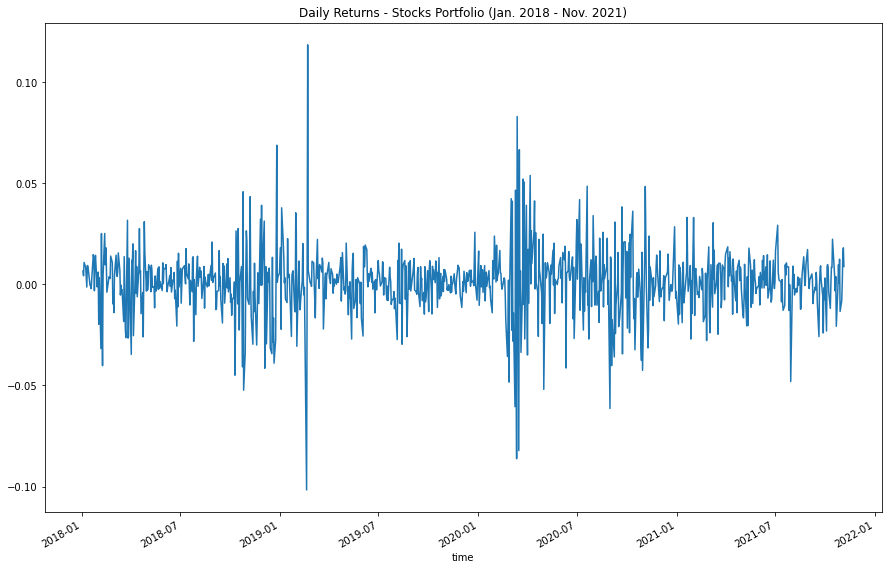

In [13]:
# Plot daily returns for the stocks portfolio
stock_daily_returns_df.plot(figsize=(15,10), title="Daily Returns - Stocks Portfolio (Jan. 2018 - Nov. 2021)")

## Calculate the Cumulative Returns of the Portfolio

In [14]:
# Calculate Cumulative Returns for Stock Portfolio
stock_cumulative_returns_df = (1 + stock_daily_returns_df).cumprod() - 1
stock_cumulative_returns_df

time
2018-01-03 00:00:00-05:00    0.006571
2018-01-04 00:00:00-05:00    0.010831
2018-01-05 00:00:00-05:00    0.021725
2018-01-08 00:00:00-05:00    0.030318
2018-01-09 00:00:00-05:00    0.033771
                               ...   
2021-11-01 00:00:00-04:00    1.040864
2021-11-02 00:00:00-04:00    1.042734
2021-11-03 00:00:00-04:00    1.072149
2021-11-04 00:00:00-04:00    1.109504
2021-11-05 00:00:00-04:00    1.128099
Length: 969, dtype: float64

### Read the Cumulative Returns Series into a CSV

In [16]:
# Read the Cumulative Returns Series into a CSV
stock_cumulative_returns_df.to_csv(Path("../data/cum_returns_stocks.csv"))

### Plot Cumulative Returns for Portfolio

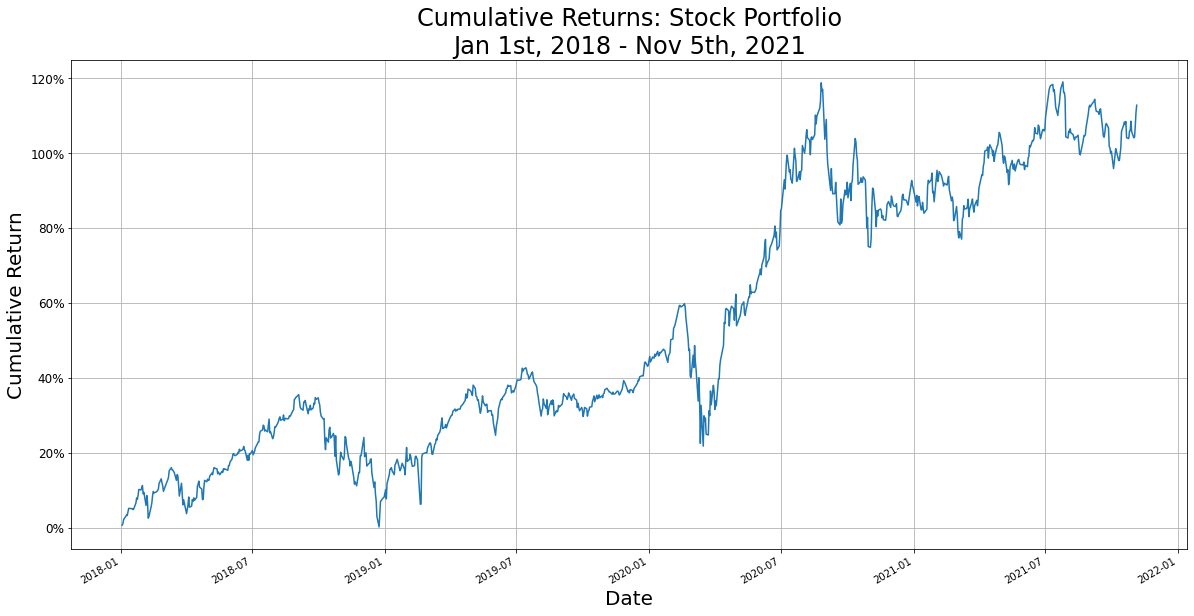

In [19]:
# Plot Cumulative Returns for Stock Portfolio
stock_cumulative_returns_plot = stock_cumulative_returns_df.plot(title="Cumulative Returns: Stock Portfolio\n"
"Jan 1st, 2018 - Nov 5th, 2021",
figsize=(20,10)
)

# Format Title
title = stock_cumulative_returns_plot.get_title()
stock_cumulative_returns_plot.set_title(title, fontdict={"fontsize":24})

# Format axes
stock_cumulative_returns_plot.set_xlabel("Date", fontdict={"fontsize":20})
stock_cumulative_returns_plot.set_ylabel("Cumulative Return", fontdict={"fontsize":20})
yticks_loc = stock_cumulative_returns_plot.get_yticks().tolist()
stock_cumulative_returns_plot.yaxis.set_major_locator(mticker.FixedLocator(yticks_loc))
stock_cumulative_returns_plot.set_yticklabels(["{:,.0%}".format(x) for x in yticks_loc], fontdict={"fontsize":12})

stock_cumulative_returns_plot.grid()

### Analyze the Volatility

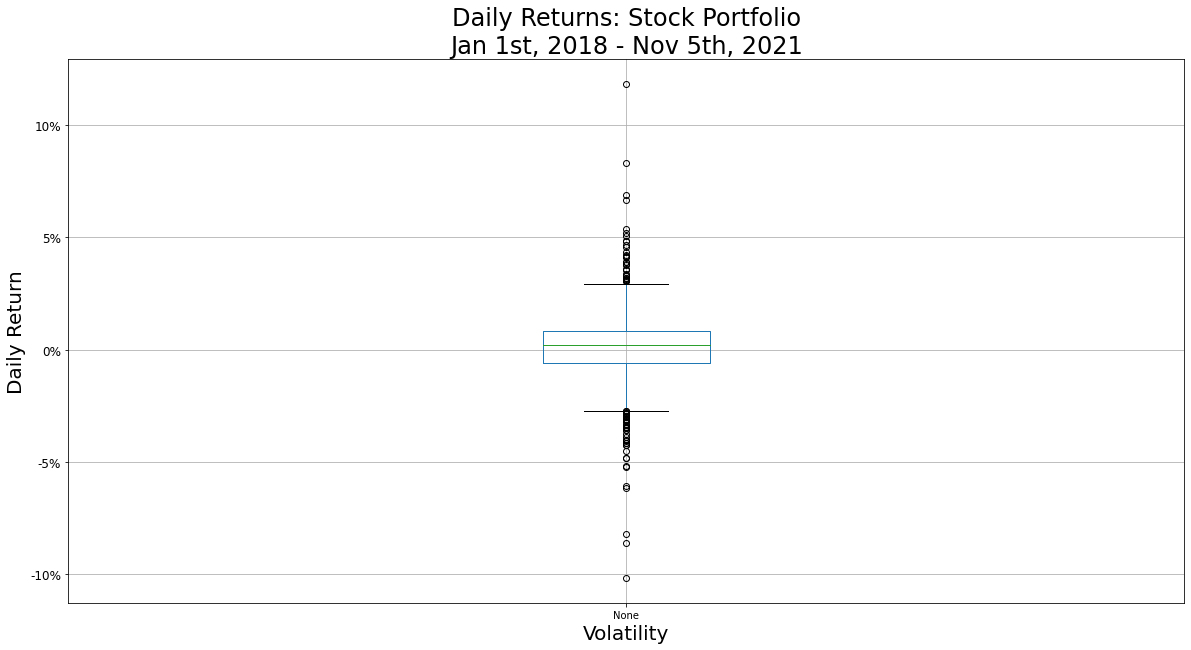

In [21]:
# Volatility Plot for Stock Portfolio
stock_volatility_plot = stock_daily_returns_df.plot.box(title="Daily Returns: Stock Portfolio\n"
"Jan 1st, 2018 - Nov 5th, 2021",
figsize=(20,10)
)

# Format Title
title = stock_volatility_plot.get_title()
stock_volatility_plot.set_title(title, fontdict={"fontsize":24})

# Format axes
stock_volatility_plot.set_xlabel("Volatility", fontdict={"fontsize":20})
stock_volatility_plot.set_ylabel("Daily Return", fontdict={"fontsize":20})
yticks_loc = stock_volatility_plot.get_yticks().tolist()
stock_volatility_plot.yaxis.set_major_locator(mticker.FixedLocator(yticks_loc))
stock_volatility_plot.set_yticklabels(["{:,.0%}".format(x) for x in yticks_loc], fontdict={"fontsize":12})

stock_volatility_plot.grid()

## Set Up and Run Monte Carlo Simulation for 10 Years

In [22]:
# Set up Monte Carlo Simulation for a 10 year time period with a $10,000 initial investment
MC_stock_ten_year = MCSimulation(
  portfolio_data=stock_prices_df,
  num_simulation=1000,
  num_trading_days=252 * 10
)

MC_stock_ten_year.portfolio_data.head()

AAPL                                    \
                             open    high     low   close    volume   
time                                                                  
2018-01-02 00:00:00-05:00  170.16  172.30  169.26  172.26  20523941   
2018-01-03 00:00:00-05:00  172.53  174.55  171.96  172.18  23193409   
2018-01-04 00:00:00-05:00  172.54  173.47  172.08  173.02  17742231   
2018-01-05 00:00:00-05:00  173.44  175.37  173.05  174.96  18402859   
2018-01-08 00:00:00-05:00  174.31  175.61  173.93  174.34  15554212   

                                           AMT                           ...  \
                          daily_return    open    high     low    close  ...   
time                                                                     ...   
2018-01-02 00:00:00-05:00          NaN  143.11  143.22  140.91  141.105  ...   
2018-01-03 00:00:00-05:00    -0.000464  141.05  142.50  140.86  141.570  ...   
2018-01-04 00:00:00-05:00     0.004879  141.44  141.96  139.58  139.630  ...   
2018-01-05 00:00:00-05:00     0.011213  140.23  140.70  139.59  140.490  ...   
2018-01-08 00:00:00-05:00    -0.003544  140.66  143.24  140.66  142.030  ...   

                               PG                                 XOM          \
                              low  close   volume daily_return   open    high   
time                                                                            
2018-01-02 00:00:00-05:00  90.550  90.66  5257189          NaN  83.82  85.195   
2018-01-03 00:00:00-05:00  90.515  90.57  3976843    -0.000993  85.16  86.965   
2018-01-04 00:00:00-05:00  90.610  91.18  4316526     0.006735  86.78  87.220   
2018-01-05 00:00:00-05:00  90.570  91.19  3848619     0.000110  86.75  86.880   
2018-01-08 00:00:00-05:00  90.930  91.71  3298886     0.005702  86.70  87.150   

                                                                    
                               low    close    volume daily_return  
time                                                                
2018-01-02 00:00:00-05:00  83.6600  85.0457   8932356          NaN  
2018-01-03 00:00:00-05:00  84.8200  86.7000  11158484     0.019452  
2018-01-04 00:00:00-05:00  86.4300  86.8100   8186390     0.001269  
2018-01-05 00:00:00-05:00  85.7050  86.6900   8326333    -0.001382  
2018-01-08 00:00:00-05:00  86.6034  87.0800   5989082     0.004499  

[5 rows x 66 columns]

### Run the MC Simulation for 10 Years

In [23]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
MC_stock_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993858,0.992505,0.992917,1.004428,1.009542,0.997823,1.003370,0.998685,0.994265,0.996136,...,0.994894,1.001181,0.996624,0.997548,0.990916,1.004598,0.996607,1.000495,0.989356,1.014872
2,0.987584,0.998513,1.007839,1.002047,1.002722,0.989203,0.998199,1.001909,0.986463,0.992623,...,0.986498,1.003097,0.989723,0.990877,0.973233,1.000418,0.984276,0.993778,0.985579,1.007749
3,0.989572,1.009076,1.014318,1.002290,0.995524,0.985845,0.991520,1.006188,0.982110,0.994450,...,0.986507,0.996583,1.000210,0.990442,0.986266,0.999571,0.984761,0.991934,0.988443,1.009935
4,0.990292,1.007282,1.006235,1.010160,0.987570,0.978361,0.982898,1.005891,0.988368,0.988251,...,0.982935,0.999092,1.016556,0.990254,0.988430,0.998063,0.982640,0.975693,0.987915,1.006788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,7.470200,7.243862,4.312149,6.165458,6.412334,6.105912,3.147097,8.671666,2.176611,3.735321,...,2.112575,4.172540,3.003358,4.247994,6.707506,3.747188,3.759078,3.598207,5.569362,3.336236
2517,7.476542,7.171501,4.321055,6.236816,6.438492,6.101124,3.177582,8.746541,2.195826,3.741845,...,2.104547,4.195828,2.967413,4.216699,6.681465,3.713584,3.714472,3.585725,5.567709,3.332793
2518,7.522712,7.162606,4.286680,6.227558,6.406925,6.101343,3.219036,8.771175,2.207346,3.752564,...,2.113851,4.200774,2.961809,4.204643,6.691617,3.721349,3.707174,3.582850,5.574539,3.342271
2519,7.532479,7.160965,4.323647,6.241225,6.452701,6.087219,3.245600,8.695430,2.214574,3.746574,...,2.128877,4.191485,2.981680,4.270569,6.688524,3.671945,3.713651,3.552499,5.590188,3.355698


### Plot the MC 10 Year Simulation Visualization

<AxesSubplot:title={'center':'1000 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

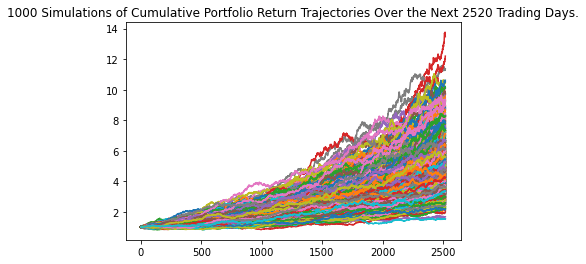

In [24]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
MC_stock_ten_year.plot_simulation()

### Plot the MC 10 Year Simulation Distribution Visualization

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 1000 Simulations'}, ylabel='Frequency'>

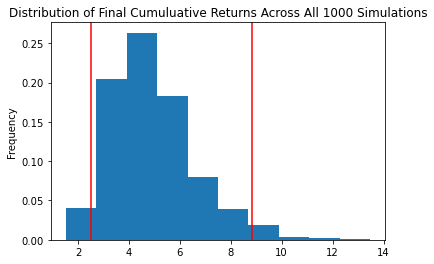

In [25]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
MC_stock_ten_year.plot_distribution()

### Generate MC 10 Year Simulation Summary Statistics

In [26]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
MC_stock_ten_year_summary_statistics = MC_stock_ten_year.summarize_cumulative_return()

# Review the 30-year Monte Carlo summary statistics
print(MC_stock_ten_year_summary_statistics)

count           1000.000000
mean               4.922245
std                1.636615
min                1.517227
25%                3.725134
50%                4.686748
75%                5.781916
max               13.473392
95% CI Lower       2.503844
95% CI Upper       8.835227
Name: 2520, dtype: float64


### Calculate the Confidence Intervals to the 95% for the 10 year Simulation on a $10,000 initial investment

In [27]:
# Calculate the 10-year confidence interval lower and upper projections for a $10,000 initial investment
stock_ten_year_lower_ci = round(MC_stock_ten_year_summary_statistics[8]*10000, 2)
stock_ten_year_upper_ci = round(MC_stock_ten_year_summary_statistics[9]*10000, 2)

print(f"With a 95% confidence interval, an initial investment of $10,000 in our Stocks Portfolio for 10 years, will be in the range of ${stock_ten_year_lower_ci} and ${stock_ten_year_upper_ci}")

With a 95% confidence interval, an initial investment of $10,000 in our Stocks Portfolio for 10 years, will be in the range of $25038.44 and $88352.27


## Set Up and Run Monte Carlo Simulation for 30 Years

In [28]:
# Set up Monte Carlo Simulation for a 30 year time period with a $10,000 initial investment
MC_stock_thirty_year = MCSimulation(
  portfolio_data=stock_prices_df,
  num_simulation=1000,
  num_trading_days=252 * 30
)

MC_stock_thirty_year.portfolio_data.head()

AAPL                                    \
                             open    high     low   close    volume   
time                                                                  
2018-01-02 00:00:00-05:00  170.16  172.30  169.26  172.26  20523941   
2018-01-03 00:00:00-05:00  172.53  174.55  171.96  172.18  23193409   
2018-01-04 00:00:00-05:00  172.54  173.47  172.08  173.02  17742231   
2018-01-05 00:00:00-05:00  173.44  175.37  173.05  174.96  18402859   
2018-01-08 00:00:00-05:00  174.31  175.61  173.93  174.34  15554212   

                                           AMT                           ...  \
                          daily_return    open    high     low    close  ...   
time                                                                     ...   
2018-01-02 00:00:00-05:00          NaN  143.11  143.22  140.91  141.105  ...   
2018-01-03 00:00:00-05:00    -0.000464  141.05  142.50  140.86  141.570  ...   
2018-01-04 00:00:00-05:00     0.004879  141.44  141.96  139.58  139.630  ...   
2018-01-05 00:00:00-05:00     0.011213  140.23  140.70  139.59  140.490  ...   
2018-01-08 00:00:00-05:00    -0.003544  140.66  143.24  140.66  142.030  ...   

                               PG                                 XOM          \
                              low  close   volume daily_return   open    high   
time                                                                            
2018-01-02 00:00:00-05:00  90.550  90.66  5257189          NaN  83.82  85.195   
2018-01-03 00:00:00-05:00  90.515  90.57  3976843    -0.000993  85.16  86.965   
2018-01-04 00:00:00-05:00  90.610  91.18  4316526     0.006735  86.78  87.220   
2018-01-05 00:00:00-05:00  90.570  91.19  3848619     0.000110  86.75  86.880   
2018-01-08 00:00:00-05:00  90.930  91.71  3298886     0.005702  86.70  87.150   

                                                                    
                               low    close    volume daily_return  
time                                                                
2018-01-02 00:00:00-05:00  83.6600  85.0457   8932356          NaN  
2018-01-03 00:00:00-05:00  84.8200  86.7000  11158484     0.019452  
2018-01-04 00:00:00-05:00  86.4300  86.8100   8186390     0.001269  
2018-01-05 00:00:00-05:00  85.7050  86.6900   8326333    -0.001382  
2018-01-08 00:00:00-05:00  86.6034  87.0800   5989082     0.004499  

[5 rows x 66 columns]

### Run the MC Simulation for 30 Years

In [29]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
MC_stock_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004582,0.996488,1.007308,1.001557,1.012244,0.988486,1.000869,0.999942,1.010107,0.997795,...,1.004599,1.000655,1.006921,1.001649,0.998790,0.996936,1.008040,1.011955,0.998319,0.994165
2,1.009168,0.995863,1.004458,0.996145,1.009502,0.990861,1.000150,1.002756,1.004523,0.996550,...,1.024061,0.994012,1.015189,0.997964,0.998359,0.995902,1.007259,1.008216,0.998400,0.995472
3,1.006715,0.998709,1.001769,0.993942,1.023668,0.993557,1.006849,1.000415,1.009190,0.998974,...,1.030142,1.000239,1.004244,0.991156,0.993061,1.002157,1.002914,1.007939,0.993350,0.992908
4,1.008575,1.004035,1.003514,0.987964,1.026301,1.004762,1.007756,1.008478,1.008967,1.004650,...,1.026955,1.002968,1.009549,0.994176,0.992537,1.010488,0.995231,1.010894,0.994713,0.988654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,166.174328,56.737258,74.018995,91.427362,190.520166,77.787264,68.794651,75.276823,157.613900,270.518495,...,167.398813,70.453552,68.224082,319.258424,120.459086,88.973861,60.754131,68.983456,104.794915,197.588820
7557,165.161956,57.439583,75.077827,91.407820,190.824730,77.625074,68.821031,75.280896,157.589341,272.011426,...,166.871898,70.805081,68.446804,321.128806,120.140499,89.481997,60.196965,69.525376,105.262476,196.887113
7558,164.545027,57.063981,75.619992,90.674910,191.187797,77.599045,69.068385,75.599815,157.163428,273.780347,...,166.310139,70.450787,67.814055,317.896689,119.584107,89.714070,60.298136,70.343475,105.038415,198.262771
7559,165.194345,56.597706,76.217808,90.298869,189.634498,77.775394,68.927173,75.800301,157.357465,274.586225,...,166.061290,70.512144,68.561751,316.362989,119.670298,89.707943,60.591215,69.805410,104.525982,198.483268


### Plot the MC 30 Year Simulation Visualization

<AxesSubplot:title={'center':'1000 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

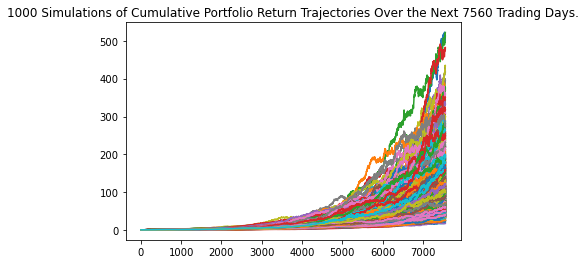

In [30]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
MC_stock_thirty_year.plot_simulation()

### Plot the MC 30 Year Simulation Distribution Visualization

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 1000 Simulations'}, ylabel='Frequency'>

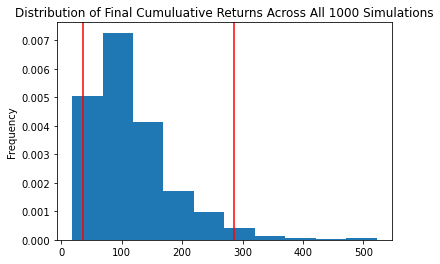

In [31]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
MC_stock_thirty_year.plot_distribution()

### Generate MC 30 Year Simulation Summary Statistics

In [32]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
MC_stock_thirty_year_summary_statistics = MC_stock_thirty_year.summarize_cumulative_return()

# Review the 30-year Monte Carlo summary statistics
print(MC_stock_thirty_year_summary_statistics)

count           1000.000000
mean             116.627503
std               68.454726
min               17.800235
25%               67.593997
50%              101.546619
75%              148.769537
max              521.721926
95% CI Lower      35.073549
95% CI Upper     285.577900
Name: 7560, dtype: float64


### Calculate the Confidence Intervals to the 95% for the 30 year Simulation on a $10,000 initial investment

In [34]:
# Calculate the 10-year confidence interval lower and upper projections for a $10,000 initial investment
stock_thirty_year_lower_ci = round(MC_stock_thirty_year_summary_statistics[8]*10000, 2)
stock_thirty_year_upper_ci = round(MC_stock_thirty_year_summary_statistics[9]*10000, 2)

print(f"With a 95% confidence interval, an initial investment of $10,000 in our Stocks Portfolio for 30 years, will be in the range of ${stock_thirty_year_lower_ci} and ${stock_thirty_year_upper_ci}")

With a 95% confidence interval, an initial investment of $10,000 in our Stocks Portfolio for 30 years, will be in the range of $350735.49 and $2855779.0


## Calculate the Standard Deviation & Annualized Standard Deviation for Our Stock Portfolio

In [36]:
# Calculate Standard Deviation for our Stock Portfolio
stock_standard_deviation = per_stock_daily_returns.std()
stock_standard_deviation = stock_standard_deviation.mean()
print("Stock Portfolio Standard Deviation")
print("-------------------------")
print(stock_standard_deviation)

Stock Portfolio Standard Deviation
-------------------------
0.020530508003801927


### Calculate Annualized Standard Deviation

In [37]:
# Calculate Annualized Standard Deviation for our Stock Portfolio
stock_annualized_standard_deviation = stock_standard_deviation * np.sqrt(252)
print("Annualized Standard Deviation")
print("--------------------")
print(stock_annualized_standard_deviation)

Annualized Standard Deviation
--------------------
0.32591171080728615


## Calculate the Sharpe Ratio for our Stock Portfolio

### Calculate the Annualized Returns

In [40]:
# Calculate the Annualized Returns for our Stock Portfolio 
stock_annualized_returns = per_stock_daily_returns.mean() * 252
stock_annualized_returns = stock_annualized_returns.mean()
print("Annualized Returns")
print("---------------------")
print(stock_annualized_returns)

Annualized Returns
---------------------
0.15875020072545043


### Calculate the Sharpe Ratio

In [43]:
# Calculate the Sharpe Ratio for Our Stock Portfolio
stock_portfolio_sharpe_ratio = stock_annualized_returns / stock_annualized_standard_deviation
print("Stock Portfolio Sharpe Ratio")
print("-------------------------------")
print(f"{stock_portfolio_sharpe_ratio: .3f}")

Stock Portfolio Sharpe Ratio
-------------------------------
 0.487
